### Which side got more contribution?

This analysis aims to investigate which side raised more money in all of the 17 propositions we studied during Mr. Welsh's classes. I intentionally disregarded committees' names to focus whether supporting or opposing side got more contributions. By the end, I present a comparative chart and a list of how much each side got for each proposition.

-- Rodolfo Viana

In [1]:
import pandas as pd
import numpy as np
props = pd.read_csv('http://www.firstpythonnotebook.org/_static/committees.csv',
                   dtype={'calaccess_prop_id': np.str,
                          'prop_name': np.str,
                          'calaccess_committee_id': np.str,
                          'committee_name': np.str,
                          'committee_position': np.str,
                          'reimbursement_number': np.str})
contribs = pd.read_csv('http://www.firstpythonnotebook.org/_static/contributions.csv',
                       dtype={'calaccess_committee_id': np.str,
                          'committee_name': np.str,
                          'amount': np.float})

In [2]:
props.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name,committee_position
0,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,382,1374469,YES ON PROPOSITION 51 - CALIFORNIANS FOR QUALI...,SUPPORT
1,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,383,1220380,COMMUNITY COLLEGE FACILITY COALITION ISSUES CO...,SUPPORT
2,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,384,1282321,TORLAKSON'S INVEST IN CALIFORNIA A BALLOT MEAS...,SUPPORT
3,ocd-contest/b51dc64d-3562-4913-a190-69f5088c22a6,1376258,70,PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-...,385,1382843,CALIFORNIA TAXPAYERS AND EDUCATORS OPPOSED TO ...,OPPOSE
4,ocd-contest/85990193-9d6f-4600-b8e7-bf1317841d82,1362198,71,PROPOSITION 052 - STATE FEES ON HOSPITALS. FED...,386,1362973,YES ON PROPOSITION 52 - A COALITION OF CALIFOR...,SUPPORT


In [3]:
# Here I name 'prop_name' as a category, so I can change it in order to consider only the number of the proposition.
#The reason: full names would not fit the chart below.

props['prop_name'] = props['prop_name'].astype('category')
props['prop_name'].cat.categories

Index(['PROPOSITION 051 - SCHOOL BONDS. FUNDING FOR K-12 SCHOOL AND COMMUNITY COLLEGE FACILITIES. INITIATIVE STATUTORY AMENDMENT.',
       'PROPOSITION 052 - STATE FEES ON HOSPITALS. FEDERAL MEDI-CAL MATCHING FUNDS. INITIATIVE STATUTORY AND CONSTITUTIONAL AMENDMENT.',
       'PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOTER APPROVAL. INITIATIVE CONSTITUTIONAL AMENDMENT.',
       'PROPOSITION 054 - LEGISLATURE. LEGISLATION AND PROCEEDINGS. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.',
       'PROPOSITION 055 - TAX EXTENSION TO FUND EDUCATION AND HEALTHCARE. INITIATIVE CONSTITUTIONAL AMENDMENT.',
       'PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.',
       'PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE CRIMINAL PROCEEDINGS AND SENTENCING. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.',
       'PROPOSITION 058 - SB 1174 (CHAPTER 753, STATUTES OF 2014), LARA. ENGLISH LAN

In [4]:
# Renaming...

props['prop_name'].cat.rename_categories([
    '51',
    '52',
    '53',
    '54',
    '55',
    '56',
    '57',
    '58',
    '59',
    '60',
    '61',
    '62',
    '63',
    '64',
    '65',
    '66',
    '67'], inplace=True)

In [5]:
# Here I select only the 'props' columns I need.

props = props[['prop_name', 'calaccess_committee_id', 'committee_position']]

In [6]:
contribs.head()

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [7]:
# Now I select only the 'contribs' columns I am going to use.

contribs['amount'] = np.array(contribs['amount'])
contribs['amount'] = np.nan_to_num(contribs['amount'])
contribs.amount.sum()

408980909.540002

In [8]:
contribs.head()

,calaccess_committee_id,committee_name,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,BERGMAN,GRETCHEN,SPRING VALLEY,CA,91978,A NEW PATH,EXECUTIVE DIRECTOR,False,84.0
1,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-09-18,KAHLE,MYRNA,SAN DIEGO,CA,92109,NATIONAL SCHOOL DISTRICT,TEACHER,False,35.0
2,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-15,MCDEVITT,LEO,ESCONDIDO,CA,92025,LIFE IONIZERS,SEO/CONTENT MANAGER,False,198.0
3,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
4,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-07-26,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,True,50.0


In [9]:
# Merging by 'calaccess_committee_id'...

dataset = pd.merge(props, contribs, on='calaccess_committee_id', how='inner')

In [10]:
# Cleaning the dataset to get only what I need.

dataset = dataset[['calaccess_committee_id', 
                   'prop_name', 
                   'committee_position', 
                   'amount']]

In [11]:
# Here I grouped by 'prop_name' and 'committee_position'. Besides that I summed the 'amount' of each side.

dataset_grouped = dataset.groupby(['prop_name', 'committee_position']).amount.sum().reset_index()

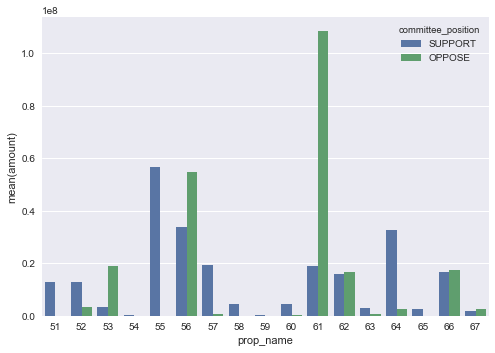

In [12]:
# To show the results in a chart, I imported matplotlib and seaborn, libraries used for data vizualisation. 
# For this type of analysis, I believe barplot is a great pick.

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import seaborn as sns

chart = sns.barplot(x='prop_name', 
            y='amount', 
            hue='committee_position', 
            data=dataset_grouped)

In [13]:
# And finally, I changed 'amount' to string, so I can suppress scientific notation and have a full list of contributions.
# Notice some propositions have no opposing side.

dataset_grouped['amount'] = dataset_grouped['amount'].astype(str)
dataset_grouped

,prop_name,committee_position,amount
0,51,SUPPORT,12987942.84
1,52,OPPOSE,3526622.28
2,52,SUPPORT,12756517.34
3,53,OPPOSE,18840500.0
4,53,SUPPORT,3500000.0
5,54,SUPPORT,152178.96
6,55,SUPPORT,56658726.67
7,56,OPPOSE,54686004.0
8,56,SUPPORT,33683287.67
9,57,OPPOSE,790047.0
